In [41]:
from HeaderP import *

In [42]:
dr3 = readfits('gaiadr3.fits')

In [48]:
list(dr3.columns)

['source_id',
 'ra',
 'dec',
 'parallax',
 'parallax_over_error',
 'pmra',
 'pmdec',
 'phot_g_mean_flux_over_error',
 'phot_bp_mean_flux_over_error',
 'phot_bp_mean_mag',
 'phot_rp_mean_flux_over_error',
 'phot_rp_mean_mag',
 'bp_rp',
 'radial_velocity',
 'radial_velocity_error',
 'astrophysical_parameters_teff_gspspec',
 'astrophysical_parameters_teff_gspspec_lower',
 'astrophysical_parameters_teff_gspspec_upper',
 'astrophysical_parameters_mh_gspspec',
 'astrophysical_parameters_mh_gspspec_lower',
 'astrophysical_parameters_mh_gspspec_upper',
 'astrophysical_parameters_alphafe_gspspec',
 'astrophysical_parameters_alphafe_gspspec_lower',
 'astrophysical_parameters_alphafe_gspspec_upper',
 'astrophysical_parameters_sife_gspspec',
 'astrophysical_parameters_sife_gspspec_lower',
 'astrophysical_parameters_sife_gspspec_upper',
 'astrophysical_parameters_cafe_gspspec',
 'astrophysical_parameters_cafe_gspspec_lower',
 'astrophysical_parameters_cafe_gspspec_upper',
 'astrophysical_parameters

Text(0, 0.5, '[α/Fe]')

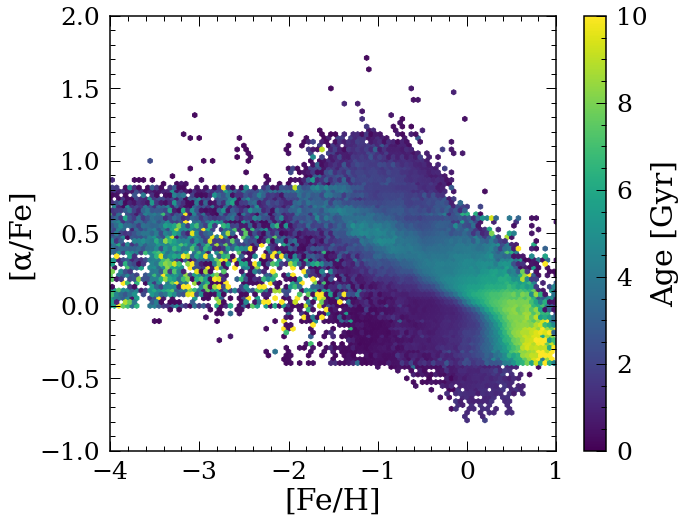

In [43]:
plt.figure(figsize=(10,8))
plt.hexbin(dr3['astrophysical_parameters_mh_gspspec'], 
           dr3['astrophysical_parameters_alphafe_gspspec'],
           C=dr3['astrophysical_parameters_age_flame'],
          vmin=0,vmax=10, extent=(-4,1,-1,2))
plt.xlim([-4, 1])
plt.ylim([-1, 2])
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')

Text(0, 0.5, '[α/Fe]')

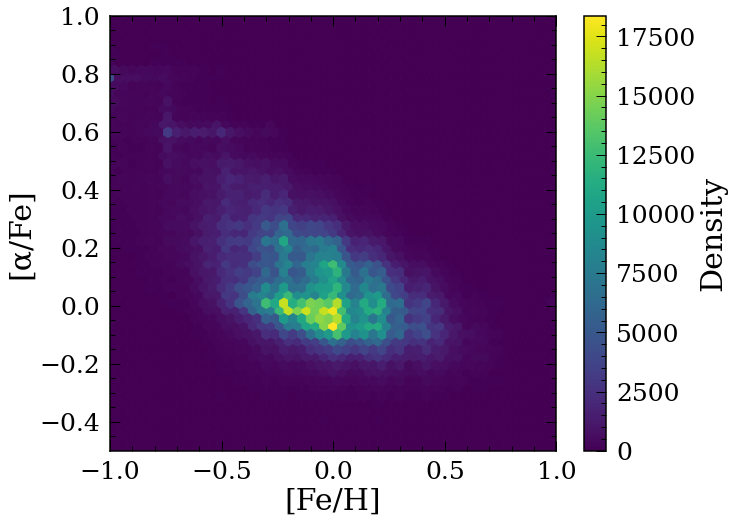

In [44]:
plt.figure(figsize=(10,8))
plt.hexbin(dr3['astrophysical_parameters_mh_gspspec'], 
           dr3['astrophysical_parameters_alphafe_gspspec'],
          extent=(-1,1,-0.5,1), gridsize=50)
plt.xlim([-1, 1])
plt.ylim([-0.5, 1])
cb = plt.colorbar()
cb.set_label('Density')
plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')

In [53]:
kinematics = pd.read_pickle('/Users/yl4331/Desktop/NewGyroKineage/dr3_kinematic.pkl')

In [54]:
dr3 = pd.merge(dr3, kinematics, left_on='source_id', right_on='source_id',
              how='inner')

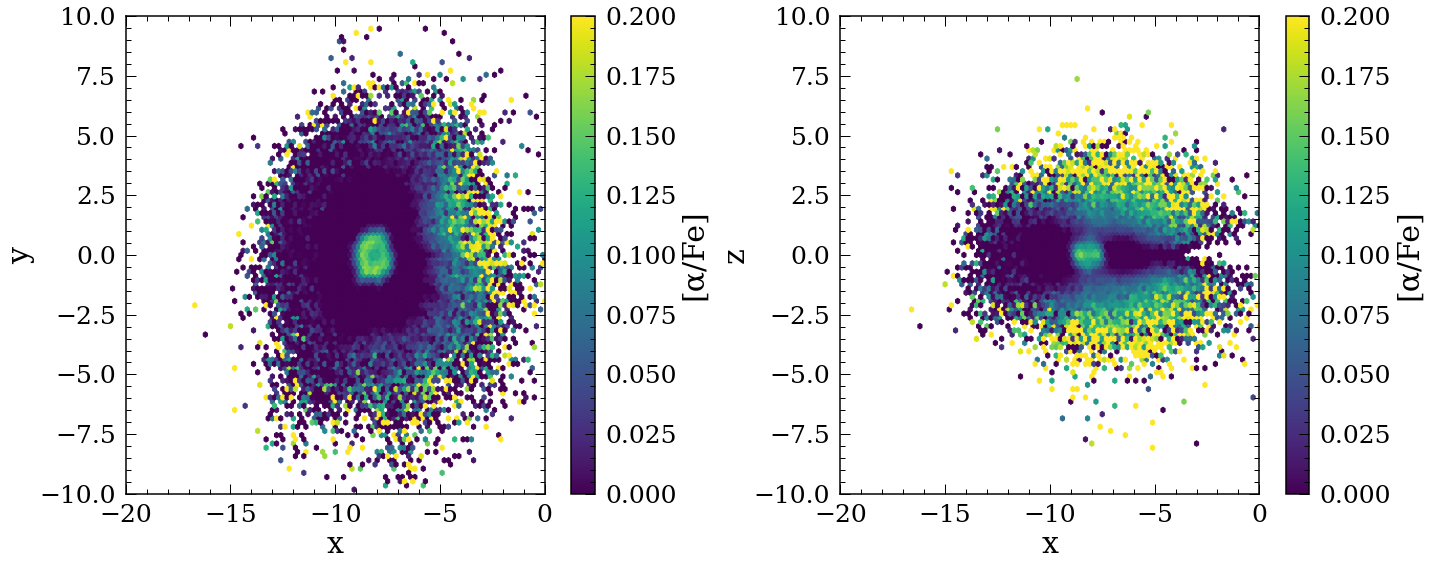

In [70]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hexbin(dr3['x'], dr3['y'],
           dr3['astrophysical_parameters_alphafe_gspspec'],
          extent=(-20, 0,-10,10), gridsize=100, vmin=0, vmax=0.2)
plt.xlim([-20, 0])
plt.ylim([-10, 10])
cb = plt.colorbar()
cb.set_label('[α/Fe]')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1,2,2)
plt.hexbin(dr3['x'], dr3['z'],
           dr3['astrophysical_parameters_alphafe_gspspec'],
          extent=(-20, 0,-10, 10), gridsize=100, vmin=0, vmax=0.2)
plt.xlim([-20, 0])
plt.ylim([-10, 10])
cb = plt.colorbar()
cb.set_label('[α/Fe]')
plt.xlabel('x')
plt.ylabel('z')

plt.tight_layout()

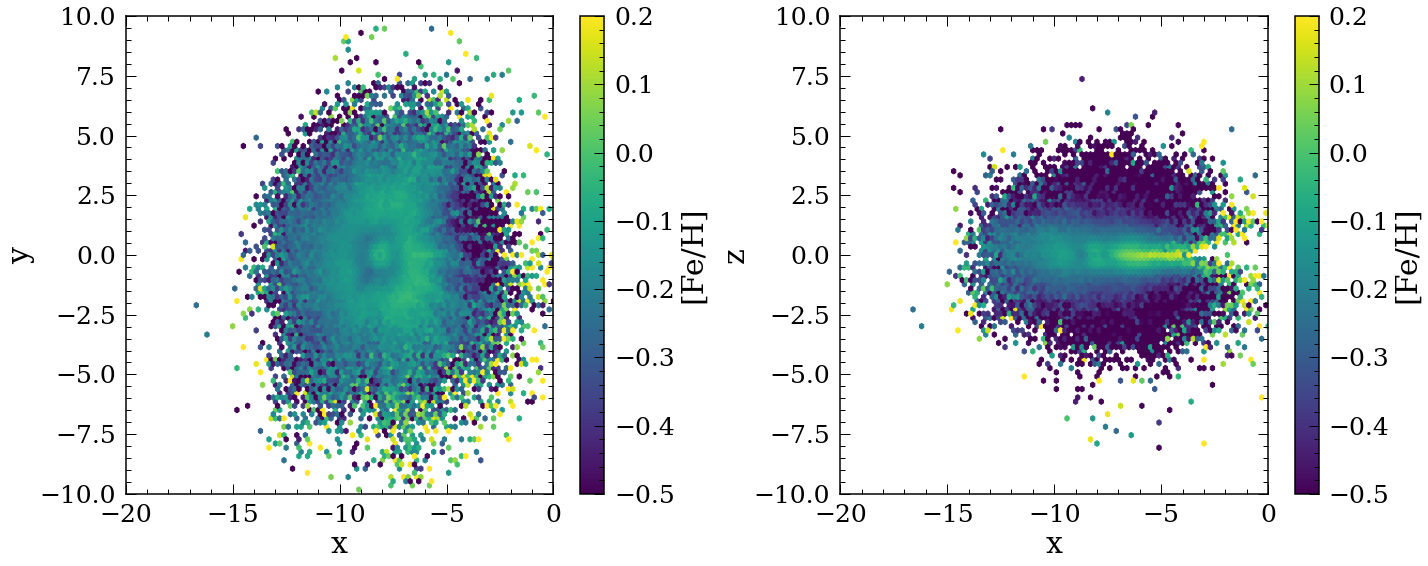

In [74]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hexbin(dr3['x'], dr3['y'],
           dr3['astrophysical_parameters_mh_gspspec'],
          extent=(-20, 0,-10,10), gridsize=100, vmin=-0.5, vmax=0.2)
plt.xlim([-20, 0])
plt.ylim([-10, 10])
cb = plt.colorbar()
cb.set_label('[Fe/H]')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1,2,2)
plt.hexbin(dr3['x'], dr3['z'],
           dr3['astrophysical_parameters_mh_gspspec'],
          extent=(-20, 0,-10,10), gridsize=100, vmin=-0.5, vmax=0.2)
plt.xlim([-20, 0])
plt.ylim([-10,10])
cb = plt.colorbar()
cb.set_label('[Fe/H]')
plt.xlabel('x')
plt.ylabel('z')

plt.tight_layout()

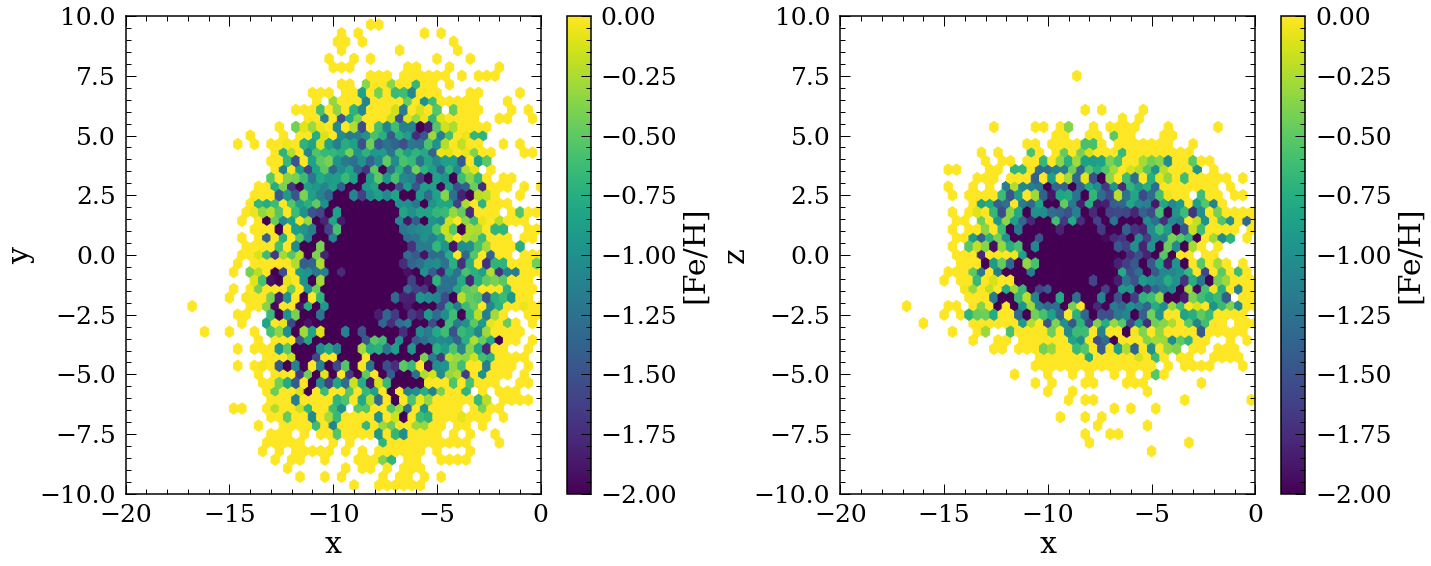

In [79]:
from scipy.stats import skew
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hexbin(dr3['x'], dr3['y'],
           dr3['astrophysical_parameters_mh_gspspec'],
          extent=(-20, 0,-10,10), gridsize=50, vmin=-2, vmax=0,
           reduce_C_function=skew)
plt.xlim([-20, 0])
plt.ylim([-10, 10])
cb = plt.colorbar()
cb.set_label('[Fe/H]')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1,2,2)
plt.hexbin(dr3['x'], dr3['z'],
           dr3['astrophysical_parameters_mh_gspspec'],
          extent=(-20, 0,-10,10), gridsize=50, vmin=-2, vmax=0,
           reduce_C_function=skew)
plt.xlim([-20, 0])
plt.ylim([-10,10])
cb = plt.colorbar()
cb.set_label('[Fe/H]')
plt.xlabel('x')
plt.ylabel('z')

plt.tight_layout()

# Crossmatch with LAMOST

In [82]:
LAMOST_dr5 = readfits('/Users/yl4331/Desktop/ZTF/osg/dr7_v2.0_LRS_stellar.fits')
LAMOST_dr5_m = readfits('/Users/yl4331/Desktop/ZTF/osg/dr7_v2.0_LRS_mstellar.fits')

/Users/yl4331/Desktop/GaiaDR3/HeaderP.py:378: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  return(pd.DataFrame(data[1].data,dtype='float64'))


In [83]:
len(LAMOST_dr5), len(LAMOST_dr5_m)

(6179327, 708797)

In [86]:
dr3['ra'] = dr3['ra_x']
dr3['dec'] = dr3['dec_x']

In [87]:
df_filt_m_LAMOST = crossmatch(dr3, LAMOST_dr5_m)
df_filt_LAMOST = crossmatch(dr3, LAMOST_dr5)


/Users/yl4331/Desktop/GaiaDR3/HeaderP.py:1346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1df2[i]=df1.iloc[idx][i].values
/Users/yl4331/Desktop/GaiaDR3/HeaderP.py:1346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1df2[i]=df1.iloc[idx][i].values
/Users/yl4331/Desktop/GaiaDR3/HeaderP.py:1346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

/Users/yl4331/Desktop/GaiaDR3/HeaderP.py:1346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1df2[i]=df1.iloc[idx][i].values
/Users/yl4331/Desktop/GaiaDR3/HeaderP.py:1346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1df2[i]=df1.iloc[idx][i].values
/Users/yl4331/Desktop/GaiaDR3/HeaderP.py:1346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

/Users/yl4331/Desktop/GaiaDR3/HeaderP.py:1346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1df2[i]=df1.iloc[idx][i].values
/Users/yl4331/Desktop/GaiaDR3/HeaderP.py:1346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1df2[i]=df1.iloc[idx][i].values
/Users/yl4331/Desktop/GaiaDR3/HeaderP.py:1346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

/Users/yl4331/Desktop/GaiaDR3/HeaderP.py:1346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1df2[i]=df1.iloc[idx][i].values
/Users/yl4331/Desktop/GaiaDR3/HeaderP.py:1346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1df2[i]=df1.iloc[idx][i].values
/Users/yl4331/Desktop/GaiaDR3/HeaderP.py:1346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

/Users/yl4331/Desktop/GaiaDR3/HeaderP.py:1346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1df2[i]=df1.iloc[idx][i].values
/Users/yl4331/Desktop/GaiaDR3/HeaderP.py:1346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1df2[i]=df1.iloc[idx][i].values
/Users/yl4331/Desktop/GaiaDR3/HeaderP.py:1346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [98]:
list(df_filt_LAMOST.columns)

['obsid',
 'designation',
 'obsdate',
 'lmjd',
 'mjd',
 'planid',
 'spid',
 'fiberid',
 'ra_obs',
 'dec_obs',
 'snru',
 'snrg',
 'snrr',
 'snri',
 'snrz',
 'objtype',
 'class',
 'subclass',
 'z',
 'z_err',
 'magtype',
 'mag1',
 'mag2',
 'mag3',
 'mag4',
 'mag5',
 'mag6',
 'mag7',
 'tsource',
 'fibertype',
 'tfrom',
 'tcomment',
 'offsets',
 'offsets_v',
 'ra',
 'dec',
 'teff',
 'teff_err',
 'logg',
 'logg_err',
 'feh',
 'feh_err',
 'rv',
 'rv_err',
 'alpha_m',
 'alpha_m_err',
 'gaia_source_id',
 'gaia_g_mean_mag',
 'source_id',
 'ra_x',
 'dec_x',
 'parallax',
 'parallax_over_error',
 'pmra',
 'pmdec',
 'phot_g_mean_flux_over_error',
 'phot_bp_mean_flux_over_error',
 'phot_bp_mean_mag',
 'phot_rp_mean_flux_over_error',
 'phot_rp_mean_mag',
 'bp_rp',
 'radial_velocity',
 'radial_velocity_error',
 'astrophysical_parameters_teff_gspspec',
 'astrophysical_parameters_teff_gspspec_lower',
 'astrophysical_parameters_teff_gspspec_upper',
 'astrophysical_parameters_mh_gspspec',
 'astrophysical_p

In [170]:
min(df_filt_LAMOST['phot_rp_mean_flux_over_error'])

22.239521026611328

In [104]:
df_filt_LAMOST['R'] = np.sqrt(df_filt_LAMOST['x']**2+df_filt_LAMOST['y']**2)
df_filt_LAMOST['dist'] = 1/df_filt_LAMOST['parallax']

<ipython-input-104-b79c93164b02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_LAMOST['R'] = np.sqrt(df_filt_LAMOST['x']**2+df_filt_LAMOST['y']**2)
<ipython-input-104-b79c93164b02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_LAMOST['dist'] = 1/df_filt_LAMOST['parallax']


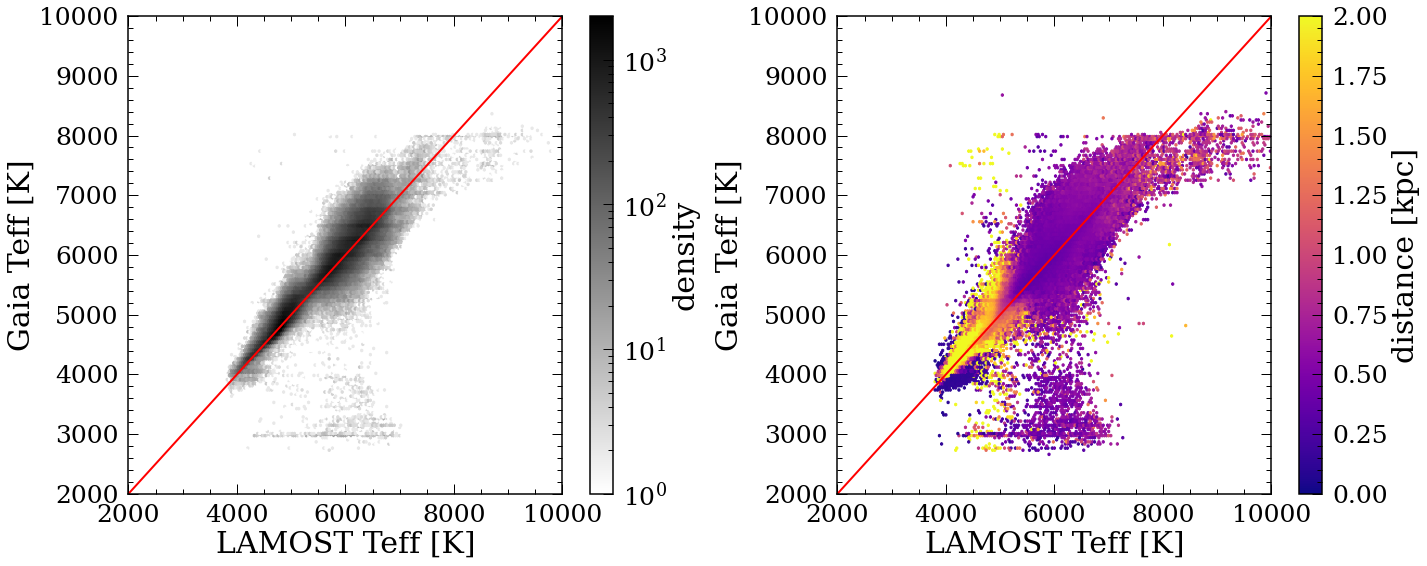

In [136]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hexbin(df_filt_LAMOST['teff'],df_filt_LAMOST['astrophysical_parameters_teff_gspspec'],
           extent=(2000,10000,2000,10000), cmap='binary',gridsize=200,bins='log')
plt.xlabel('LAMOST Teff [K]')
plt.ylabel('Gaia Teff [K]')
cb = plt.colorbar()
cb.set_label('density')
plt.plot([2000, 10000], [2000, 10000], 'r-')
plt.xlim([2000, 10000])
plt.ylim([2000, 10000])

plt.subplot(1,2,2)
plt.hexbin(df_filt_LAMOST['teff'],df_filt_LAMOST['astrophysical_parameters_teff_gspspec'],
        C=df_filt_LAMOST['dist'], extent=(2000,10000,2000,10000), 
           vmin=0, vmax=2, cmap='plasma',gridsize=200)
plt.xlabel('LAMOST Teff [K]')
plt.ylabel('Gaia Teff [K]')
cb = plt.colorbar()
cb.set_label('distance [kpc]')
plt.plot([2000, 10000], [2000, 10000], 'r-')
plt.xlim([2000, 10000])
plt.ylim([2000, 10000])
plt.tight_layout()

In [169]:
print(len(df_filt_LAMOST))
df_filt_LAMOST = df_filt_LAMOST.loc[df_filt_LAMOST['parallax']>0]
print(len(df_filt_LAMOST))

582698
582698


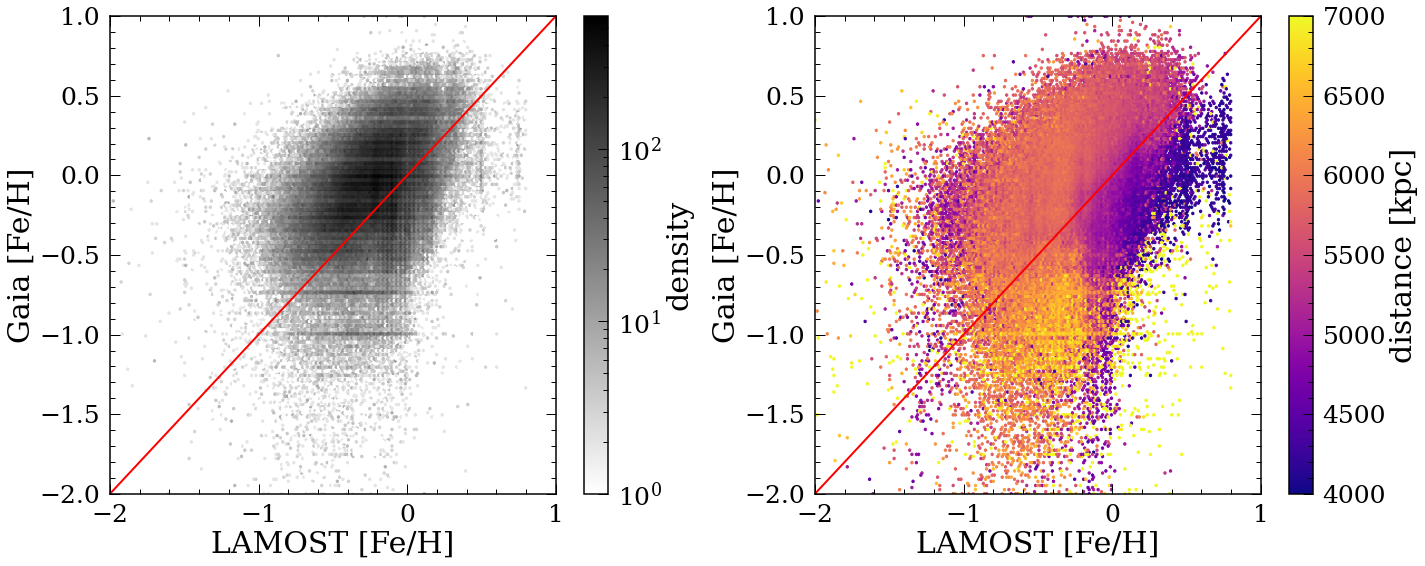

In [143]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hexbin(df_filt_LAMOST['feh'],df_filt_LAMOST['astrophysical_parameters_mh_gspspec'], 
           extent=(-2,1,-2,1), cmap='binary',gridsize=200,bins='log')
cb = plt.colorbar()
cb.set_label('density')
plt.xlabel('LAMOST [Fe/H]')
plt.ylabel('Gaia [Fe/H]')
plt.plot([-2,1], [-2,1], 'r-')
plt.xlim([-2,1])
plt.ylim([-2,1])

plt.subplot(1,2,2)
plt.hexbin(df_filt_LAMOST['feh'],df_filt_LAMOST['astrophysical_parameters_mh_gspspec'],
        C=df_filt_LAMOST['teff'], extent=(-2,1,-2,1), 
           vmin=4000, vmax=7000, cmap='plasma',gridsize=200)
cb = plt.colorbar()
cb.set_label('distance [kpc]')
plt.xlabel('LAMOST [Fe/H]')
plt.ylabel('Gaia [Fe/H]')
plt.plot([-2,1], [-2,1], 'r-')
plt.xlim([-2,1])
plt.ylim([-2,1])

plt.tight_layout()

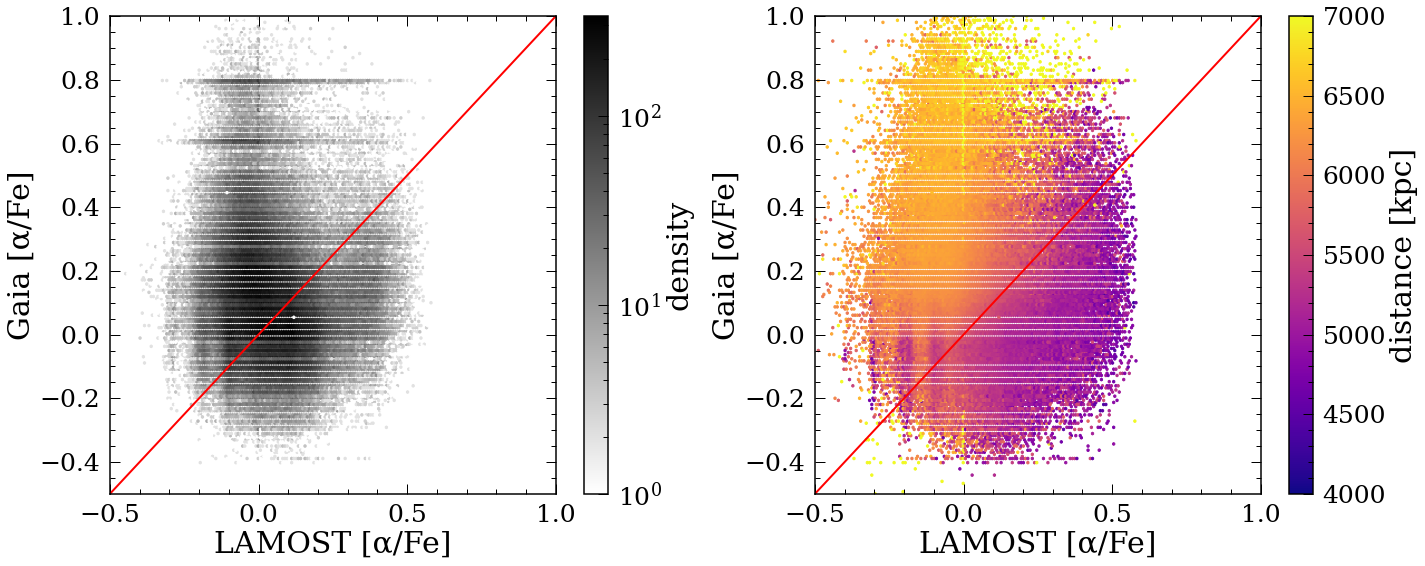

In [142]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hexbin(df_filt_LAMOST['alpha_m'],df_filt_LAMOST['astrophysical_parameters_alphafe_gspspec'], 
           extent=(-0.5,1,-0.5,1), cmap='binary',gridsize=200,bins='log')
"""plt.plot(df_filt_LAMOST['alpha_m'],df_filt_LAMOST['astrophysical_parameters_alphafe_gspspec'],
        'k.', markersize=0.1)"""
plt.xlabel('LAMOST [α/Fe]')
plt.ylabel('Gaia [α/Fe]')
cb = plt.colorbar()
cb.set_label('density')
plt.plot([-0.5,1], [-0.5,1], 'r-')
plt.xlim([-0.5,1])
plt.ylim([-0.5,1])


plt.subplot(1,2,2)
plt.hexbin(df_filt_LAMOST['alpha_m'],df_filt_LAMOST['astrophysical_parameters_alphafe_gspspec'],
        C=df_filt_LAMOST['teff'], extent=(-0.5,1,-0.5,1), 
           vmin=4000, vmax=7000, cmap='plasma',gridsize=200)
"""plt.plot(df_filt_LAMOST['alpha_m'],df_filt_LAMOST['astrophysical_parameters_alphafe_gspspec'],
        'k.', markersize=0.1)"""
plt.xlabel('LAMOST [α/Fe]')
plt.ylabel('Gaia [α/Fe]')
cb = plt.colorbar()
cb.set_label('distance [kpc]')
plt.plot([-0.5,1], [-0.5,1], 'r-')
plt.xlim([-0.5,1])
plt.ylim([-0.5,1])

plt.tight_layout()


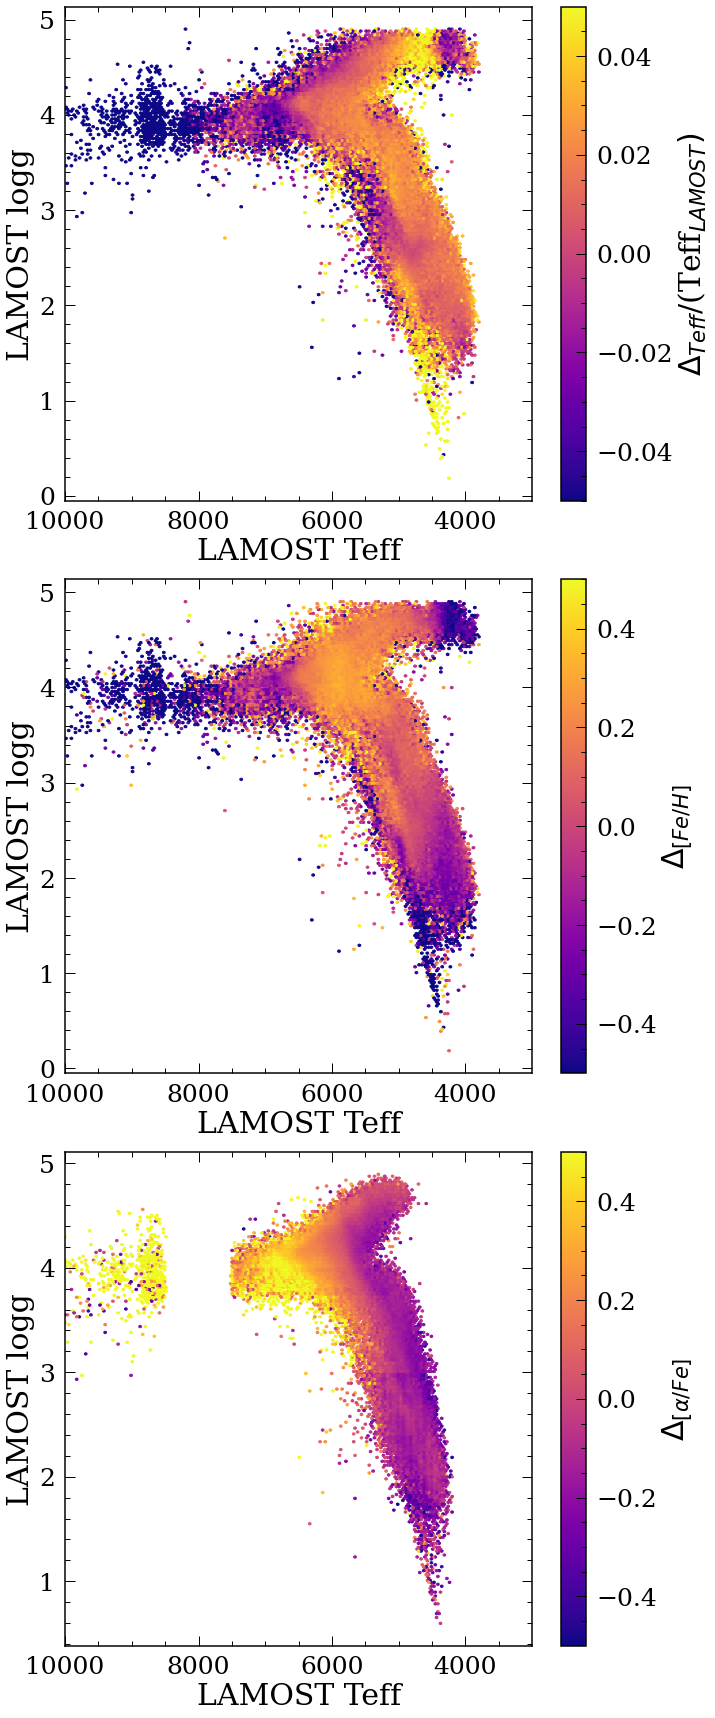

In [167]:
df_filt_LAMOST_alpha = df_filt_LAMOST.loc[df_filt_LAMOST['alpha_m']>-100].reset_index(drop=True)
plt.figure(figsize=(10,24))
plt.subplot(3,1,3)
plt.hexbin(df_filt_LAMOST_alpha['teff'],df_filt_LAMOST_alpha['logg'],
           C = df_filt_LAMOST_alpha['astrophysical_parameters_alphafe_gspspec']-df_filt_LAMOST_alpha['alpha_m'], 
           cmap='plasma',gridsize=200,vmin=-0.5, vmax=0.5)
plt.xlabel('LAMOST Teff')
plt.ylabel('LAMOST logg')
cb = plt.colorbar()
cb.set_label('$Δ_{[α/Fe]}$')
#plt.plot([-0.5,1], [-0.5,1], 'r-')
#plt.xlim([-0.5,1])
plt.xlim([10000,3000])

df_filt_LAMOST_alpha = df_filt_LAMOST.loc[df_filt_LAMOST['feh']>-100].reset_index(drop=True)
plt.subplot(3,1,2)
plt.hexbin(df_filt_LAMOST_alpha['teff'],df_filt_LAMOST_alpha['logg'],
           C = -df_filt_LAMOST_alpha['feh']+df_filt_LAMOST_alpha['astrophysical_parameters_mh_gspspec'], 
           cmap='plasma',gridsize=200,vmin=-0.5, vmax=0.5)
plt.xlabel('LAMOST Teff')
plt.ylabel('LAMOST logg')
cb = plt.colorbar()
cb.set_label('$Δ_{[Fe/H]}$')
#plt.plot([-0.5,1], [-0.5,1], 'r-')
#plt.xlim([-0.5,1])
plt.xlim([10000,3000])


plt.subplot(3,1,1)
plt.hexbin(df_filt_LAMOST_alpha['teff'],df_filt_LAMOST_alpha['logg'],
           C = (-df_filt_LAMOST_alpha['teff']+df_filt_LAMOST_alpha['astrophysical_parameters_teff_gspspec'])/df_filt_LAMOST_alpha['teff'], 
           cmap='plasma',gridsize=200,vmin=-0.05, vmax=0.05)
plt.xlabel('LAMOST Teff')
plt.ylabel('LAMOST logg')
cb = plt.colorbar()
cb.set_label('$Δ_{Teff}$/(Teff$_{LAMOST})$')
#plt.plot([-0.5,1], [-0.5,1], 'r-')
#plt.xlim([-0.5,1])
plt.xlim([10000,3000])

plt.tight_layout()

plt.savefig('LAMOSTvsGaiaDR3.png')
